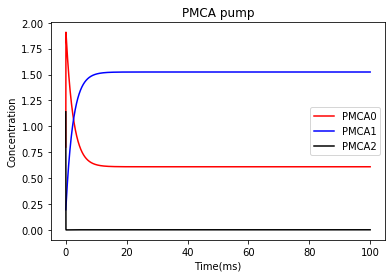

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

kpm1 = 1.5e-01   #/uM/ms
kpm2 = 20e-03     #/ms
kpm3 = 100e-03     #/ms
kpm4 = 1e02    #/ms
kpm_leak = 12.5e-03   #/ms
Ca = 2 #mM

def model(y,t):
    dy = np.zeros((3,))
    PMCA0 = y[0]
    PMCA1 = y[1]
    PMCA2 = y[2]
    
    dy[0] = (kpm2*PMCA1)+(kpm4*PMCA2)-(kpm1*PMCA0*Ca)
    dy[1] = (kpm1*PMCA0*Ca) - (kpm2+kpm3)*PMCA1
    dy[2] = (kpm3*PMCA1) - (kpm4*PMCA2)
    
    return dy

y0 = [0.80,0.1953,1.14]
t = np.arange(0.0,100.01,0.01)
sol = odeint(model,y0,t)

plt.plot(t,sol[:,0],'r', label="PMCA0")
plt.plot(t,sol[:,1],'b', label="PMCA1")
plt.plot(t,sol[:,2],'k', label="PMCA2")
plt.xlabel("Time(ms)")
plt.ylabel("Concentration")
plt.title("PMCA pump")
plt.legend()
plt.show()